In [1]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read files:
df = pd.read_csv("D:\\technocalobs\\Bigmart\\train.csv")
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [4]:
df.shape

(8523, 12)

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
overall_sales_rate = df['Item_Outlet_Sales'].mean()
overall_sales_rate

2181.288913575032

In [7]:
df.groupby("Outlet_Identifier")["Item_Identifier"].count()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Item_Identifier, dtype: int64

In [10]:
# Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Print correlation matrix
print(corr_matrix)

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


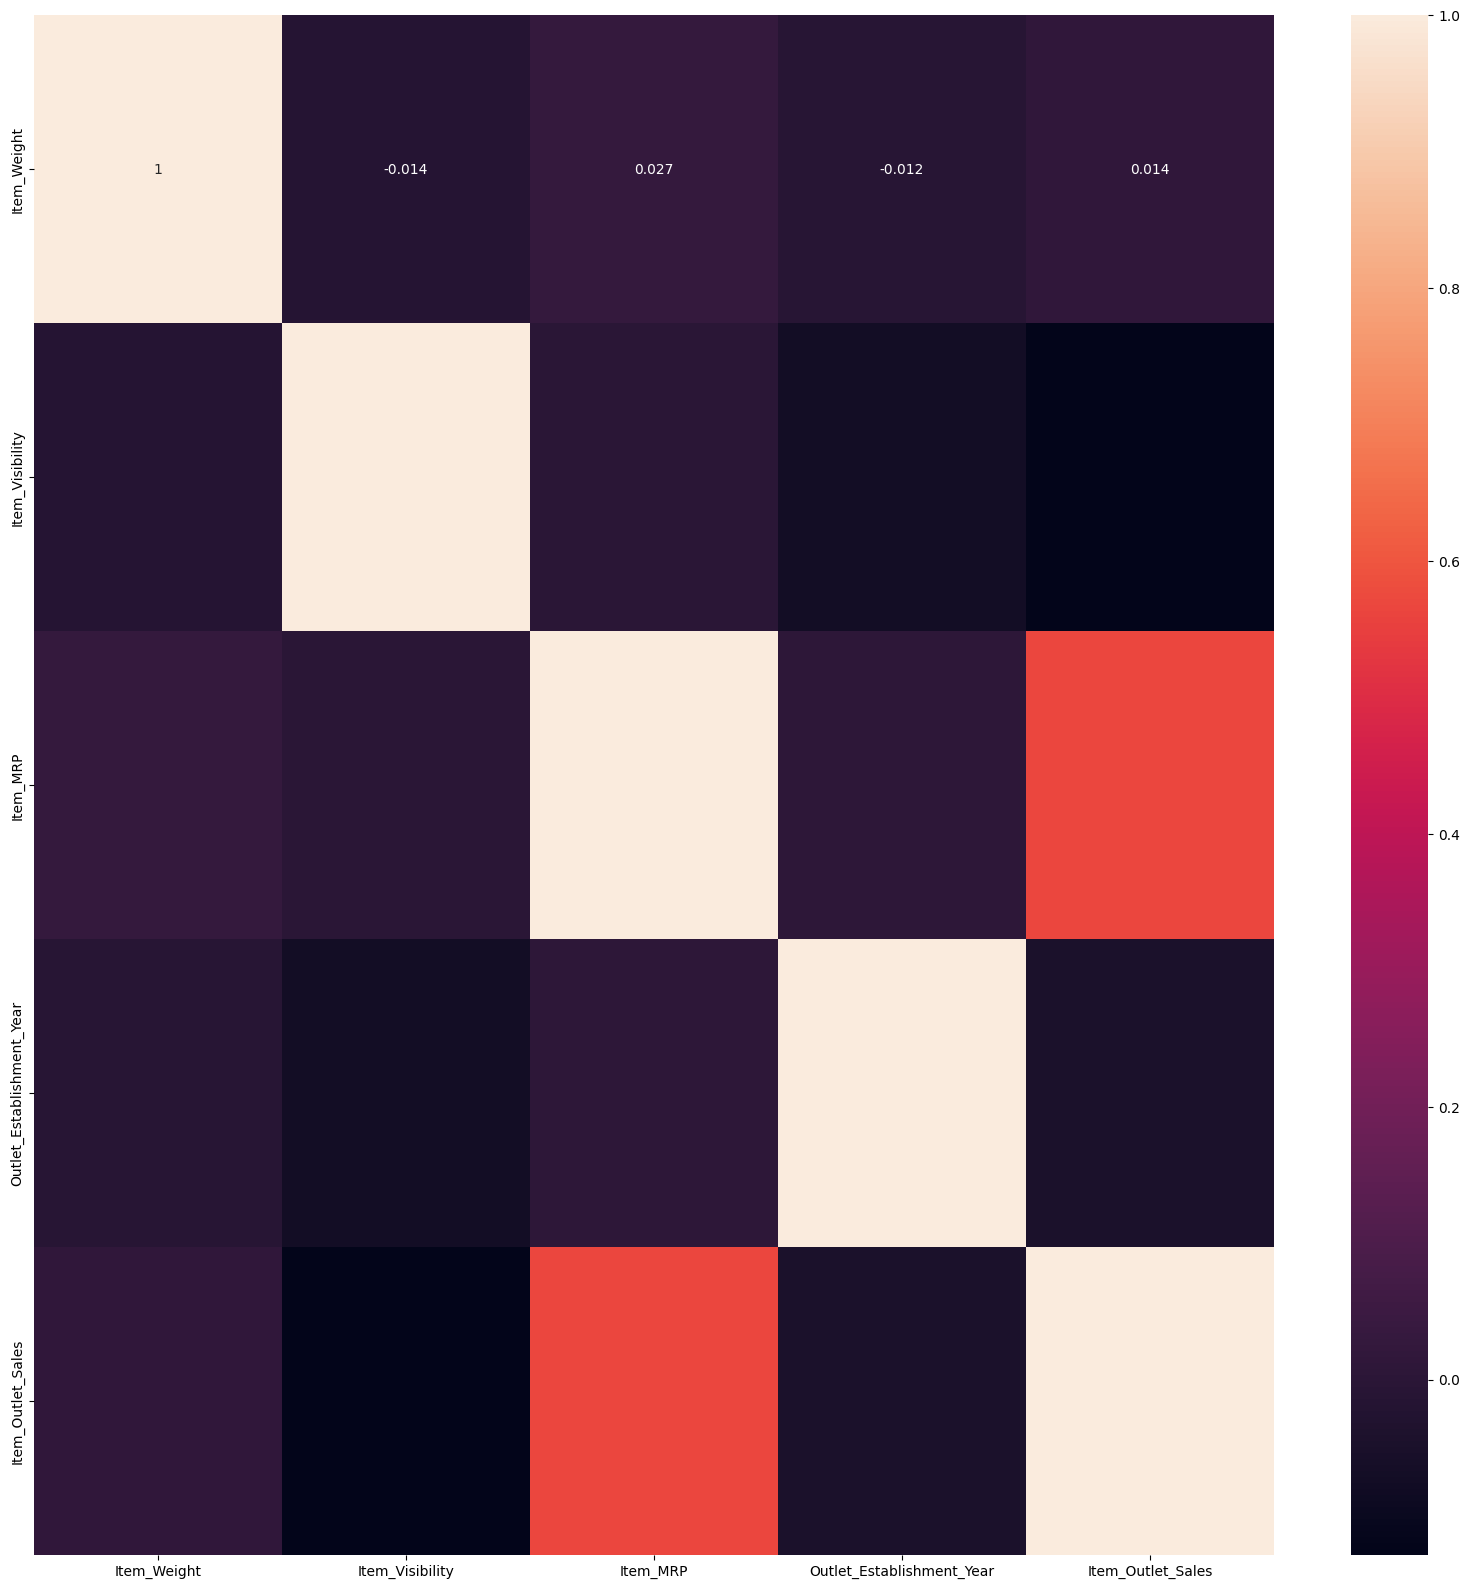

In [15]:
# Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_cols.corr(), annot=True)
plt.show()


We see that the Item_MRP is highly correlated with Item_outlet_Sales. Therefore,we want to compute the association of the target with each feature while adjusting for the effect of the remaining features.

This can be done using Univariante and Bivariante linear regression.

# Univariante Analysis

In [16]:
X=df['Item_MRP'].values.reshape(-1,1)
y=df['Item_Outlet_Sales']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 1)
(1705, 1)
(6818,)
(1705,)


In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = lr_model.predict(X_train)
y_pred

array([2835.69742746, 3328.64112023, 1374.34457741, ...,  518.94855385,
       1506.81626215, 3389.66138157])

In [21]:
from sklearn.metrics import r2_score

score = r2_score(y_train,y_pred)
print("Score of Training:",100*score)

Score of Training: 32.43246964591502


In [22]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 32.22
RMSE : 1413
CV Score : Mean - 1412 | Std - 55.39 | Min - 1317 | Max - 1521


# Polynomial Regression

Create interaction features for the case study data using scikit-learn's PolynomialFeatures.

In [23]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X.reshape(-1,1),y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [24]:
poly_pred=pipe.predict(X.reshape(-1,1))

In [25]:
from sklearn.metrics import r2_score

score = r2_score(y,poly_pred)
print(100*score)

32.22099987574039


In [26]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 32.22
RMSE : 1413
CV Score : Mean - 1412 | Std - 55.39 | Min - 1317 | Max - 1521


# Bivariante Analysis

In [27]:
response_features = ['Item_Visibility','Item_MRP']

In [28]:
X=df[response_features].values
y=df['Item_Outlet_Sales']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 2)
(1705, 2)
(6818,)
(1705,)


In [31]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = lr_model.predict(X_train)
y_pred

array([3043.60249718, 3211.42554978, 1376.73625763, ...,   90.2221131 ,
       1709.73041526, 3608.45044745])

In [33]:
from sklearn.metrics import r2_score

score = r2_score(y_train,y_pred)
print(100*score)


33.96643163649037


In [34]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))



Model Report
MAE : 32.1
RMSE : 1397
CV Score : Mean - 1396 | Std - 57.26 | Min - 1300 | Max - 1509


# Polynomial Regression

Create interaction features for the case study data using scikit-learn's PolynomialFeatures.

In [35]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [36]:
poly_pred=pipe.predict(X)

In [37]:
from sklearn.metrics import r2_score

score = r2_score(y,poly_pred)
print(100*score)

34.94178051361624


In [38]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))



Model Report
MAE : 32.1
RMSE : 1397
CV Score : Mean - 1396 | Std - 57.26 | Min - 1300 | Max - 1509
